In [8]:
import pickle

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import datetime as dt
from macrosim.SeriesAccessor import SeriesAccessor

In [9]:
with open('./out.pkl', 'rb') as f:
    df = pickle.load(f)
for col in df.columns[:-1]:
    df[col] = df[col].apply(lambda x: x[0])
df

,CIVPART,RIMP,UNEMP,DOMINV,CPI,TFP,output
0,66.629947,1908.629043,5.741333,-1438.456017,2.791485,2.000077,11240.622159
1,66.629364,1910.456520,5.927667,717.747023,2.755900,1.999918,13349.577149
2,66.579715,1927.013703,5.808667,-101.627116,2.592263,2.000000,12617.829673
3,66.528933,1956.967270,5.727667,329.504980,2.340104,2.000000,13126.233114
4,66.544591,1988.697803,5.732333,150.549795,2.245928,2.200000,13042.762443
5,66.659499,2020.524387,5.718667,-3172.774918,2.312387,2.000150,9830.988025
6,66.634230,2024.451063,5.918667,-199.756432,2.305409,1.999842,12796.556838
7,66.583813,2037.129277,5.829000,-1680.851910,2.153514,2.000000,11372.401940
8,66.566249,2041.724483,5.710000,-829.077237,1.945445,2.000000,12230.030078
9,66.631902,2042.604807,5.628333,-1221.984519,1.897733,2.200000,11836.289071


In [10]:
fred = SeriesAccessor(
    key_path='../fred_key.env',
    key_name='FRED_KEY'
)
start = dt.datetime.fromisoformat('2002-01-01')
end = dt.datetime.fromisoformat('2024-12-31')

act = fred.get_series(
    series_ids=['GDPC1'],
    series_alias=['RGDP'],
    date_range=(start, end)
)

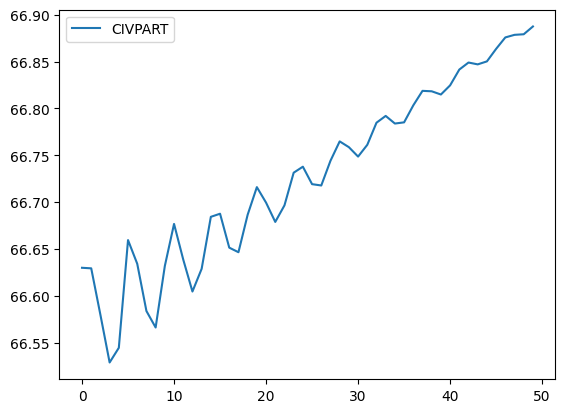

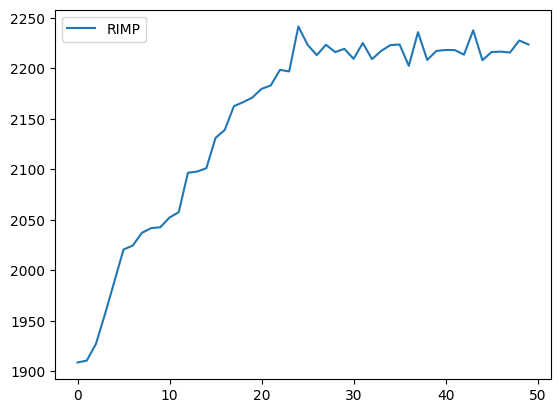

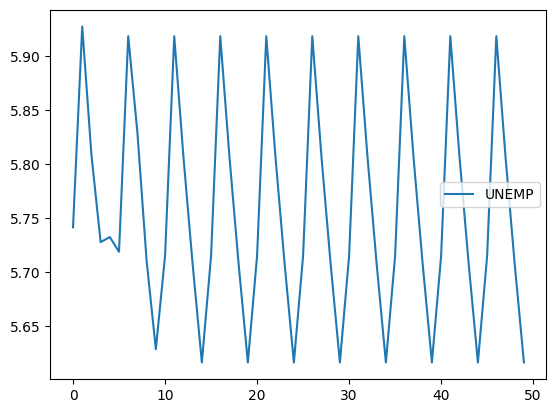

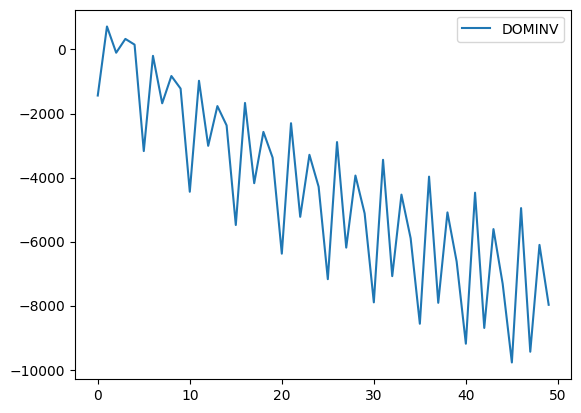

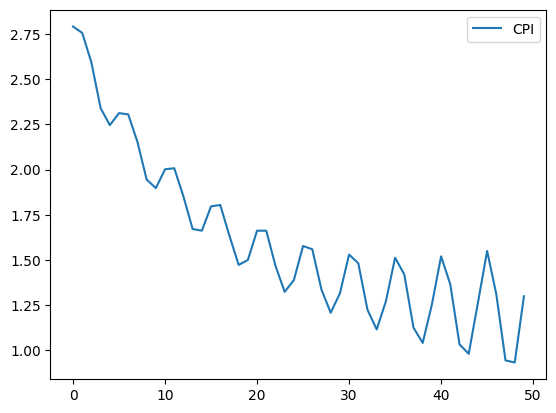

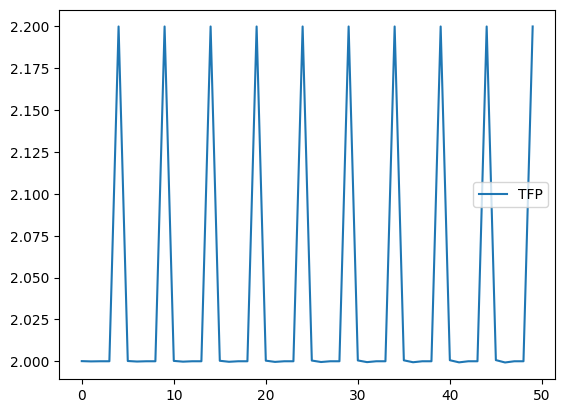

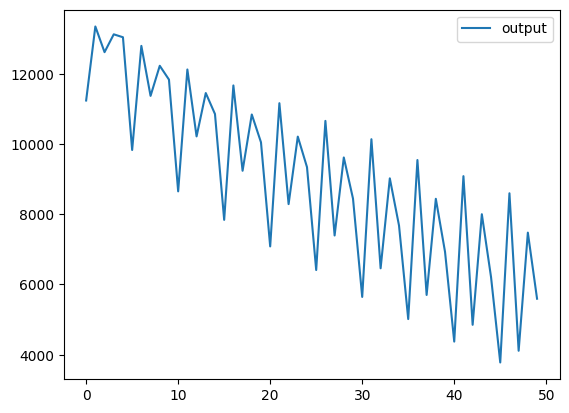

<Figure size 640x480 with 0 Axes>

In [11]:
for col in df.columns:
    plt.plot(df[col], label=col)
    plt.legend()
    plt.show()
plt.clf()

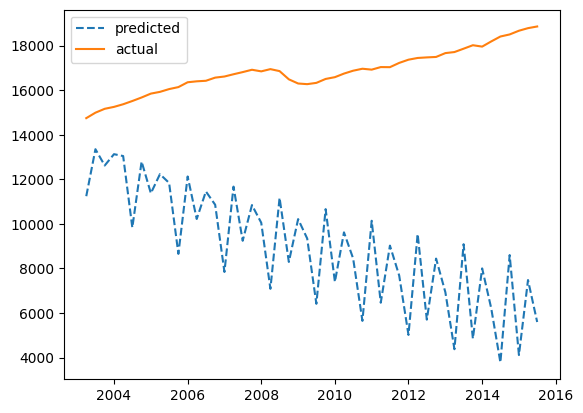

In [12]:
pred = df['output']
act = act.iloc[5:55]

pred.index = act.index

plt.plot(pred, label='predicted', linestyle='--')
plt.plot(act, label='actual')
plt.legend()

In [13]:
r2_score(act, pred)

-74.33104275775982

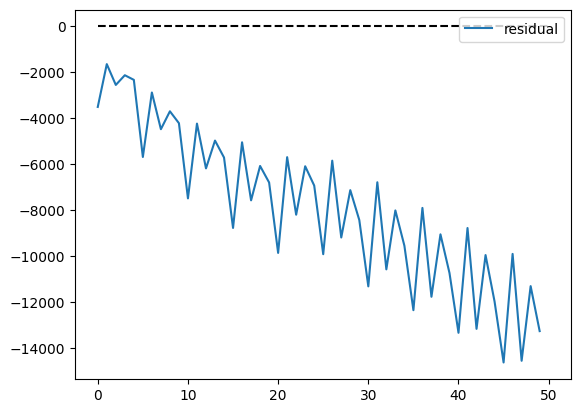

In [14]:
resid = (pred - act['RGDP']).reset_index(drop=True)
resid.plot(label='residual')
plt.hlines(0, 0, 50, linestyle='--', color='black')
plt.legend()
plt.show()